<a href="https://colab.research.google.com/github/alexiakarine/IA_SerieTemporal_TemperaturasSaoPaulo/blob/main/serieTemporal_temperaturas2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Pandas
import pandas as pd

# Configuração do matplotlib
import matplotlib.pyplot as plt # biblioteca usada paa visualizar os dados
plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5 
%matplotlib inline # mostrar os gráficos gerados pelo Matplotlib

# Sklearn e Skforecast
from sklearn.ensemble import RandomForestRegressor # biblioteca usada especificamente para a regressão aleatória florestal,

!pip install skforecast
from skforecast.ForecasterAutoreg import ForecasterAutoreg #biblioteca usada para previsão de séries temporais

In [83]:
#Carrega um conjunto de dados sobre temperaturas de São Paulo, usando a biblioteca Pandas para ler o arquivo CSV na variável "data"
url = 'https://raw.githubusercontent.com/alexiakarine/IA_SerieTemporal_TemperaturasSaoPaulo/main/station_sao_paulo.csv'
data = pd.read_csv(url, sep=',')
data.drop(['D-J-F', 'M-A-M', 'J-J-A', 'S-O-N', 'metANN'], axis=1, inplace=True) # remove algumas colunas do conjunto de dados 
data.head(5) # exibe as primeiras 5 linhas do conjunto de dados 


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
0,1946,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,999.90,21.74
1,1947,999.90,23.54,21.04,19.74,19.24,999.90,15.04,16.44,18.04,17.04,18.94,20.34
2,1948,23.64,22.94,20.74,20.04,18.04,16.64,17.84,15.64,18.64,18.74,20.64,21.24
3,1949,22.34,21.54,23.54,19.44,17.24,17.34,16.34,17.34,18.24,18.74,19.74,21.54
4,1950,22.14,22.44,22.24,20.44,19.44,17.94,16.44,19.14,19.54,19.04,19.94,21.94


In [84]:
# Usa o método melt() para transformar as colunas em linhas
data_melted = pd.melt(data, id_vars=['YEAR'], var_name='MONTH', value_name='TEMP') 
#O parâmetro id_vars é usado para especificar quais colunas do conjunto de dados
# devem ser mantidas como identificadores únicos para cada linha, 
# parâmetro var_name é usado para especificar o nome da coluna que irá armazenar 
#o nome original das colunas que estão sendo "desfeitas"
#parâmetro value_name é usado para especificar o nome da coluna que irá armazenar
# os valores que antes estavam em diferentes colunas.
                      
print(data_melted)


     YEAR MONTH    TEMP
0    1946   JAN  999.90
1    1947   JAN  999.90
2    1948   JAN   23.64
3    1949   JAN   22.34
4    1950   JAN   22.14
..    ...   ...     ...
883  2015   DEC   24.50
884  2016   DEC   24.20
885  2017   DEC   23.70
886  2018   DEC   24.55
887  2019   DEC  999.90

[888 rows x 3 columns]


In [85]:
# Alterando todos os valor 999.90 para 22.30 na coluna TEMP
data_melted['TEMP'] = data_melted['TEMP'].replace({999.90: 22.30})

print(data_melted)

     YEAR MONTH   TEMP
0    1946   JAN  22.30
1    1947   JAN  22.30
2    1948   JAN  23.64
3    1949   JAN  22.34
4    1950   JAN  22.14
..    ...   ...    ...
883  2015   DEC  24.50
884  2016   DEC  24.20
885  2017   DEC  23.70
886  2018   DEC  24.55
887  2019   DEC  22.30

[888 rows x 3 columns]


In [86]:
# Tratamento de dados
# Converte os valores da coluna 'YEAR' do DataFrame 'data_melted' de numéricos para strings,
data_melted['YEAR'] = data_melted['YEAR'].astype(str)

# concatena das colunas 'YEAR' e 'MONTH' como strings separadas pelo caractere '-'
data_melted['DATE'] = data_melted['YEAR'] + '-' + data_melted['MONTH']

print(data_melted)

     YEAR MONTH   TEMP      DATE
0    1946   JAN  22.30  1946-JAN
1    1947   JAN  22.30  1947-JAN
2    1948   JAN  23.64  1948-JAN
3    1949   JAN  22.34  1949-JAN
4    1950   JAN  22.14  1950-JAN
..    ...   ...    ...       ...
883  2015   DEC  24.50  2015-DEC
884  2016   DEC  24.20  2016-DEC
885  2017   DEC  23.70  2017-DEC
886  2018   DEC  24.55  2018-DEC
887  2019   DEC  22.30  2019-DEC

[888 rows x 4 columns]


In [ ]:
#Excluindo as colunas Year e MONTH que não serão mais uilizadas 
# O parâmetro 'axis=1' indica que as colunas devem ser removidas, e o parâmetro 
#'inplace=True' indica que a operação deve ser realizada diretamente no 
#DataFrame 'data_melted', ou seja, as colunas serão removidas permanentemente do conjunto de dados.
data_melted.drop(['YEAR', 'MONTH'], axis=1, inplace=True)

In [88]:
#tratamento de dados
# Converte data_melted de string para datetime 
data_melted['DATE'] = pd.to_datetime(data_melted['DATE'], format='%Y-%b')

print(data_melted)


      TEMP       DATE
0    22.30 1946-01-01
1    22.30 1947-01-01
2    23.64 1948-01-01
3    22.34 1949-01-01
4    22.14 1950-01-01
..     ...        ...
883  24.50 2015-12-01
884  24.20 2016-12-01
885  23.70 2017-12-01
886  24.55 2018-12-01
887  22.30 2019-12-01

[888 rows x 2 columns]


In [ ]:
# Seto o índice
#remove todas as linhas que contenham valores ausentes (NaN) do DataFrame 'data_melted'
data_melted.dropna()
data_melted = data_melted.set_index('DATE')



In [91]:
# Defino a frequência (Mensal). Caso falte registro, cria um novo e preenche as demais colunas com 0.0
data_melted = data_melted.asfreq('MS', fill_value=0.0)

In [96]:
# Ordena pela data_melted
data_melted = data_melted.sort_index()

In [ ]:
# Plota os dados
fig, ax = plt.subplots(figsize=(9, 4)) 
#cria uma figura e um conjunto de eixos (axes) com o método subplots() definindo o tamanho da figura com o parâmetro figsize=(9, 4)
data_melted['TEMP'].plot(ax=ax, label='TEMP')
#a coluna 'TEMP' do DataFrame 'data_melted' é plotada como uma linha no gráfico 
#A opção 'ax=ax' define que a linha deve ser plotada no conjunto de eixos (axes) criado anteriormente
ax.legend();
# para exibir uma legenda no gráfico

In [102]:
## Verifica se está faltando alguma data
print(f'Number of rows with missing values: {data.isnull().any(axis=1).mean()}')

Number of rows with missing values: 0.0


In [105]:
# Código para verificar se não existem "buracos" nos dados
(data_melted.index == pd.date_range(start=data_melted.index.min(),
                             end=data_melted.index.max(),
                             freq=data_melted.index.freq)).all()

True

In [ ]:
# Divide dados em treinamento e teste
# Para séries temporais, sempre utilizamos os dados mais recentes para teste
steps = 36
data_train = data_melted[:-steps]
data_test  = data_melted[-steps:]

print(f"Train dates : {data_train.index.min()} --- {data_train.index.max()}  (n={len(data_train)})")
print(f"Test dates  : {data_test.index.min()} --- {data_test.index.max()}  (n={len(data_test)})")

# Plotando os dados
fig, ax=plt.subplots(figsize=(9, 4)) #cria uma nova figura do Matplotlib 

data_train['TEMP'].plot(ax=ax, label='train') 
#plota a série temporal de temperatura do conjunto de treinamento na figura criada anteriormente. A série é representada por uma linha contínua.

data_test['TEMP'].plot(ax=ax, label='test')
#plota a série temporal de temperatura do conjunto de teste na mesma figura. 
#A série também é representada por uma linha contínua, mas com uma cor diferente da linha do conjunto de treinamento.

ax.legend(); # indica que a linha deve ser plotada nos mesmos eixos da figura

In [ ]:
# Configura e treina um RandomForestRegressor para série temporal
# Os parâmetros foram retirados do melhor modelo encontrado no material de origem
# Para conseguir os melhores parâmetros se faz necessário realizer hyperparameter tunning (verifique artigo original)
# prevê o futuro
forecaster = ForecasterAutoreg(
                regressor = RandomForestRegressor(max_depth=10, n_estimators=50, random_state=123),
                lags      = 12
             )
# criando uma instância de um modelo de previsão
#o modelo é ajustado aos dados de treinamento 
forecaster.fit(y=data_train['TEMP'])
forecaster

In [110]:
# Faz predição no conjunto de teste
# gerar previsões para o número de etapas
steps = 36
predictions = forecaster.predict(steps=steps)
predictions.head(5) #é usado para exibir as cinco primeiras previsões geradas pelo modelo.

2017-01-01    23.860331
2017-02-01    24.391593
2017-03-01    24.115014
2017-04-01    22.405941
2017-05-01    18.911197
Freq: MS, Name: pred, dtype: float64

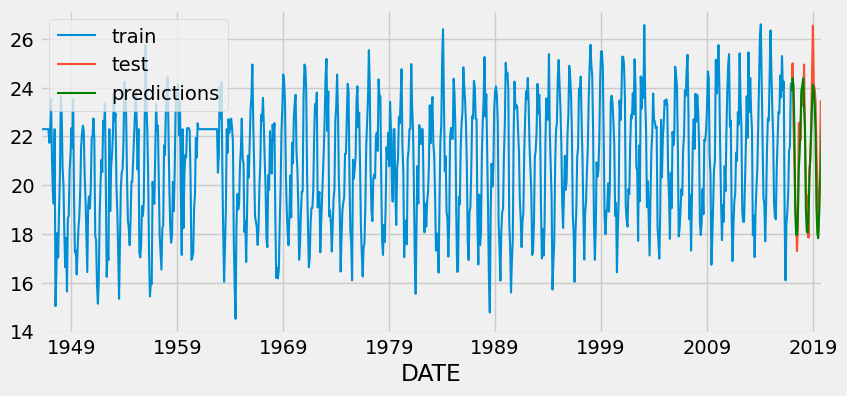

In [111]:
# Plota a predição, comparando com valores reais
fig, ax=plt.subplots(figsize=(9, 4))
data_train['TEMP'].plot(ax=ax, label='train') # dados de treinamento 
data_test['TEMP'].plot(ax=ax, label='test')   #dados de teste
predictions.plot(ax=ax, label='predictions', color='green') # previsões geradas pelo modelo
ax.legend(); #legenda